★★★★★★★★★help()
★★★★★★★★★model.get_params()
★★★★★★★★★model.get_params().keys()
★★★★★★★★★model.get_params().values()
★★★★★★★★★dic = {"key":model.get_params().keys(),"values":model.get_params().values()}

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

import missingno as msno


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import StandardScaler





from sklearn.ensemble     import RandomForestRegressor, RandomForestClassifier
from sklearn.tree         import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# ---- 추가 모델
from sklearn.ensemble     import AdaBoostRegressor, VotingRegressor
from xgboost              import XGBRegressor
from lightgbm             import LGBMRegressor



from pycaret.classification import *

In [56]:
# pip install missingno

# Data Load

In [57]:
df = pd.read_csv('./datasets/21_glass.csv')
df.head(2)


,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [58]:
df.info()
# 타겟은 glass_type!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ri          214 non-null    float64
 1   na          214 non-null    float64
 2   mg          214 non-null    float64
 3   al          214 non-null    float64
 4   si          214 non-null    float64
 5   k           184 non-null    float64
 6   ca          214 non-null    float64
 7   ba          214 non-null    float64
 8   fe          213 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [59]:
df["fe"].unique()

array([0.  , 0.26, 0.11, 0.24, 0.17, 0.07, 0.19, 0.14, 0.22, 0.06, 0.3 ,
       0.16, 0.1 , 0.09, 0.31, 0.03, 0.12, 0.32, 0.15, 0.2 , 0.34, 0.28,
       0.08, 0.29, 0.21, 0.18, 0.25, 0.35, 0.37, 0.51,  nan, 0.01])

<Figure size 640x480 with 0 Axes>

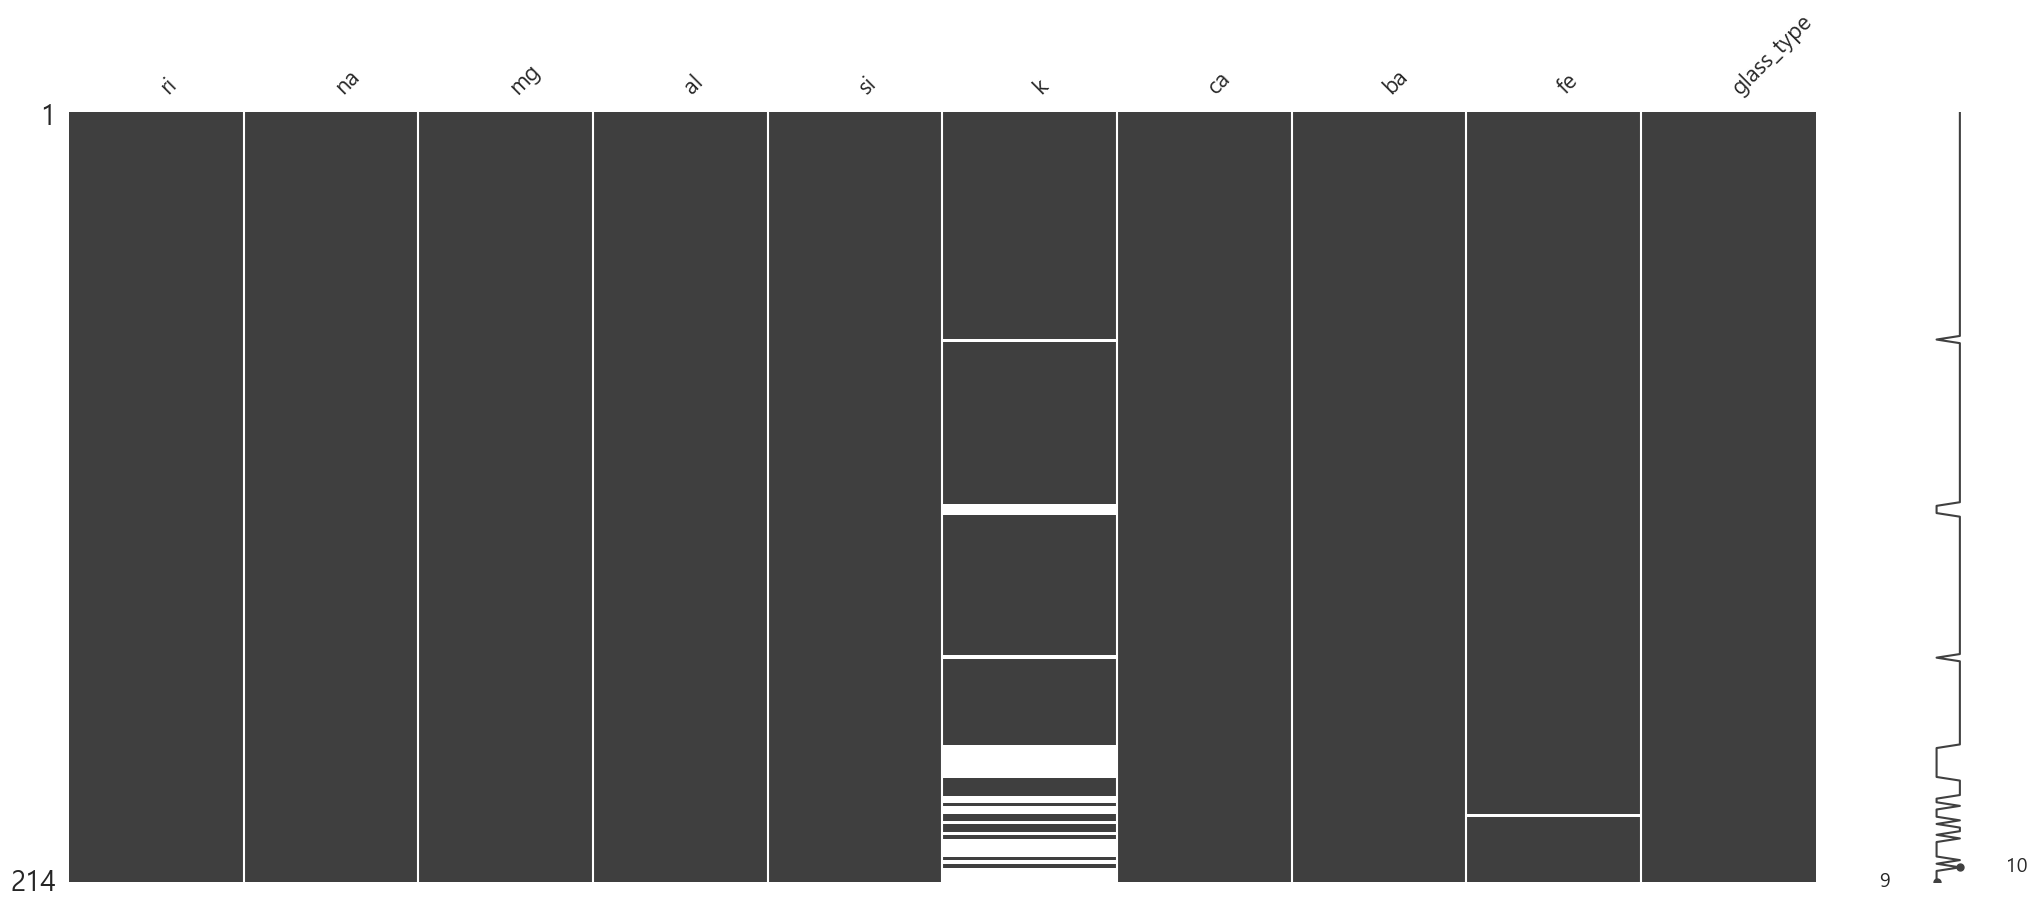

In [60]:

plt.figure()
msno.matrix(df)
plt.show()

# Feature desc
<pre>
Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)  없음
-- 5 containers
-- 6 tableware
-- 7 headlamps

# EDA

## Target
 Multi classification

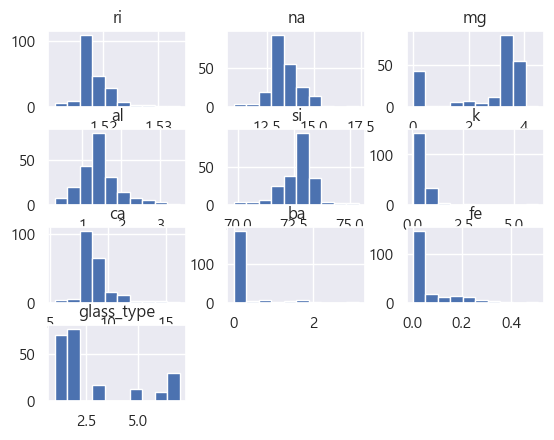

In [61]:
df.hist()
plt.show()

<AxesSubplot: >

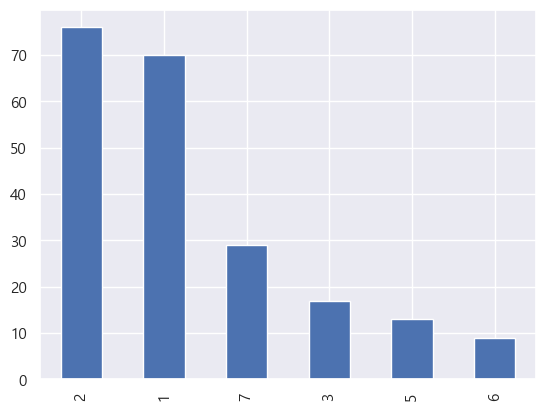

In [62]:
df["glass_type"].value_counts().plot(kind = 'bar')

# Preprocessing


##  결측, object 없애기

In [63]:
df['fe'] = df['fe'].fillna(0)


In [64]:
df['fe'].isna().sum()

0

In [65]:
df['k'] = df['k'].fillna(0)

In [66]:
df['k'].isna().sum()

0

## 스케일링

In [67]:
y = df['glass_type']
X = df.drop('glass_type', axis = 1)

In [68]:
X_train,X_test, y_train,y_test=train_test_split(X,y, test_size = 0.2, random_state = 1)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [69]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

# 스케일링 된 결과 값으로 본래 값을 구할 수도 있다.
# X_origin = std_scaler.inverse_transform(X_train_scaled)

In [70]:
df['k'].mode()

0    0.0
Name: k, dtype: float64

In [ ]:
# help(RandomForestClassifier)
# 빅분기 셤에서 쓰자!!!!
# 예제도 가끔 있으니까 복붙해서 쓰자

# Predict
<pre>
★help(RandomForestClassifier)

DTC 
 std_scaler > 0.7674418604651163
 df['k'].fillna(0) > 0.7674418604651163


RF 
 std_scaler,df['k'].fillna(0)>  0.7209302325581395

In [75]:
dtc = DecisionTreeClassifier(random_state = 4)
dtc.fit(X_train_scaled, y_train)
pred = dtc.predict(X_test_scaled)

sc = accuracy_score(y_test,pred)
sc

0.7674418604651163

In [73]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train_scaled, y_train)
pred = rf.predict(X_test_scaled)

sc = accuracy_score(y_test,pred)
sc

0.7441860465116279

# pycaret

## 전처리

In [ ]:
s = setup(df, target = "glass_type", silent = True, session_id = 1)

In [ ]:
get_config()

## 내장모델

In [82]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsClassifier,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDClassifier,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessClassifier,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron.MLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


<분류모델>
회귀모델같지만 ★★★분류모델★★★
Logistic Regression	 : "분류"모델이다!!!!!!/
SVM - Linear Kernel
SVM - Radial Kernel  
GaussianNB
 kernel 함수 > 확률밀도 구한다

## 모델 비교

In [84]:
best_model = compare_models(n_select = 3    , sort='Accuracy') 
# rf 튜닝하자

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7990,0.7284,0.7756,0.7994,0.7778,0.7305,0.7460,0.0750
et,Extra Trees Classifier,0.7662,0.7260,0.7337,0.7811,0.7538,0.6863,0.7005,0.0680
lightgbm,Light Gradient Boosting Machine,0.7119,0.7148,0.6485,0.7161,0.6959,0.6100,0.6244,0.0300
gbc,Gradient Boosting Classifier,0.6981,0.6917,0.6114,0.6916,0.6780,0.5900,0.6041,0.1530
dt,Decision Tree Classifier,0.6452,0.5899,0.6124,0.6824,0.6369,0.5256,0.5394,0.0060
knn,K Neighbors Classifier,0.5995,0.6611,0.5099,0.5816,0.5709,0.4456,0.4616,0.0110
lda,Linear Discriminant Analysis,0.5914,0.6286,0.5008,0.5738,0.5576,0.4238,0.4428,0.0060
lr,Logistic Regression,0.5514,0.6298,0.4593,0.4759,0.4989,0.3674,0.3851,0.0990
ridge,Ridge Classifier,0.5443,0.0000,0.4149,0.4849,0.4969,0.3524,0.3713,0.0050
ada,Ada Boost Classifier,0.4767,0.5461,0.4392,0.3861,0.3892,0.2868,0.3711,0.0440


## 파라미터 튜닝

In [89]:
rf = create_model("rf")
tuned_rf, tuner = tune_model(rf, return_tuner =True)
tuned_rf, tuner

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6000,0.8510,0.5583,0.6333,0.5863,0.4578,0.4704
1,0.6667,0.8819,0.7000,0.6460,0.6333,0.5536,0.5708
2,0.6667,0.9105,0.4333,0.5667,0.6051,0.5192,0.5439
3,0.7333,0.8333,0.7333,0.6889,0.7091,0.6341,0.6383
4,0.8667,0.0000,0.7667,0.8381,0.8414,0.8065,0.8230
5,0.8000,0.0000,0.9000,0.8714,0.7889,0.7273,0.7595
6,0.7333,0.9016,0.6806,0.7190,0.7077,0.6296,0.6379
7,0.6667,0.8972,0.6667,0.7746,0.6495,0.5665,0.6090
8,0.6667,0.8881,0.6667,0.7333,0.6467,0.5714,0.6024


(RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                        criterion='entropy', max_depth=6, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.002, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                        oob_score=False, random_state=1, verbose=0,
                        warm_start=False),
 RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                    error_score=nan,
                    estimator=Pipeline(memory=None,
                                       steps=[('empty_step', 'passthrough'),
                                              ('actual_estimator',
                                               RandomForestClassifier(bootstrap=True,
                                           

In [95]:
mydic = {"max_leaf_nodes": [15,20,25]
        ,"max_depth":[5,7,10] }
tuned_rf = tune_model(rf, custom_grid = mydic)
tuned_model, tuner = tune_model(rf, custom_grid=mydic
                                , return_tuner=True
                                , choose_better = True
                               )
print(tuned_model, tuner)
# 튜닝용으로만 써라, 속도빠름
# 튜닝하고 점수 좋아졌나 ? 바로바로 볼 수 있다!!

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.8333,0.5917,0.6838,0.6444,0.5455,0.5608
1,0.7333,0.8733,0.8667,0.7444,0.7202,0.6512,0.6627
2,0.8000,0.9057,0.6333,0.7417,0.7527,0.7188,0.7499
3,0.7333,0.8610,0.7333,0.6889,0.7091,0.6341,0.6383
4,0.9333,0.0000,0.9667,0.9444,0.9333,0.9057,0.9114
5,0.8667,0.0000,0.9333,0.9048,0.8644,0.8125,0.8334
6,0.8000,0.9495,0.7639,0.7667,0.7778,0.7289,0.7333
7,0.6667,0.8652,0.6667,0.7746,0.6495,0.5665,0.6090
8,0.7333,0.8915,0.6944,0.7800,0.7348,0.6532,0.6649


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('empty_step', 'passthrough'),
                                             ('actual_estimator',
                                              RandomForestClassifier(bootstrap=True,
                                                          